In [3]:
# Must be included at the beginning of each notebook. Remember to change the app name. 
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('data_understanding').getOrCreate()

In [4]:
# Use Spark to read in the Maternal Health csv file; you can infer csv schemas.
data = spark.read.csv("Maternal Health Risk Data Set.csv", inferSchema=True, header=True)
data.show()

+---+----------+-----------+----------+--------+---------+---------+----------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|   comment|
+---+----------+-----------+----------+--------+---------+---------+----------+
| 25|       130|         80|      15.0|    98.0|       86|high risk|no comment|
| 35|       140|         90|      13.0|    98.0|       70|high risk|no comment|
| 29|        90|         70|       8.0|   100.0|       80|high risk|no comment|
| 30|       140|         85|       7.0|    98.0|       70|high risk|no comment|
| 35|       120|         60|       6.1|    98.0|       76| low risk|no comment|
| 23|       140|         80|      7.01|    98.0|       70|high risk|no comment|
| 23|       130|         70|      7.01|    98.0|       78| mid risk|no comment|
| 35|        85|         60|      11.0|   102.0|       86|high risk|no comment|
| 32|       120|         90|       6.9|    98.0|       70| mid risk|no comment|
| 42|       130|         80|      18.0| 

In [5]:
data.filter((data['Age']==-9999999) | (data['Age']==1000) | (data['heartRate']==7)).show()

+--------+----------+-----------+----------+--------+---------+---------+----------+
|     Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|   comment|
+--------+----------+-----------+----------+--------+---------+---------+----------+
|-9999999|       110|         65|       7.1|    96.0|       70| low risk|no comment|
|    1000|       110|         65|       7.1|    96.0|       70| low risk|no comment|
|      16|       120|         75|       7.9|    98.0|        7| low risk|no comment|
|      16|       120|         75|       7.9|    98.0|        7| low risk|no comment|
+--------+----------+-----------+----------+--------+---------+---------+----------+



In [6]:
# drop the 'comment' column    
data=data.drop('comment')
data.show()

+---+----------+-----------+----------+--------+---------+---------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|
+---+----------+-----------+----------+--------+---------+---------+
| 25|       130|         80|      15.0|    98.0|       86|high risk|
| 35|       140|         90|      13.0|    98.0|       70|high risk|
| 29|        90|         70|       8.0|   100.0|       80|high risk|
| 30|       140|         85|       7.0|    98.0|       70|high risk|
| 35|       120|         60|       6.1|    98.0|       76| low risk|
| 23|       140|         80|      7.01|    98.0|       70|high risk|
| 23|       130|         70|      7.01|    98.0|       78| mid risk|
| 35|        85|         60|      11.0|   102.0|       86|high risk|
| 32|       120|         90|       6.9|    98.0|       70| mid risk|
| 42|       130|         80|      18.0|    98.0|       70|high risk|
| 23|        90|         60|      7.01|    98.0|       76| low risk|
| 19|       120|         80|      

In [7]:
data.describe('Age', 'SystolicBP', 'DiastolicBP', 'bloodsugar', 'bodyTemp', 'heartRate').show()


+-------+------------------+------------------+------------------+------------------+-----------------+-----------------+
|summary|               Age|        SystolicBP|       DiastolicBP|        bloodsugar|         bodyTemp|        heartRate|
+-------+------------------+------------------+------------------+------------------+-----------------+-----------------+
|  count|              1018|              1018|              1018|              1018|             1018|             1018|
|   mean|-9792.494106090373|113.15618860510806|  76.4155206286837| 8.711758349705306|98.65461689587426|74.26522593320236|
| stddev|313420.50358674483|18.349769141423746|13.877014050287782|3.2831447548609125|1.378812601251565|8.063318071767053|
|    min|          -9999999|                70|                49|               6.0|             96.0|                7|
|    max|              1000|               160|               100|              19.0|            103.0|               90|
+-------+---------------

In [8]:
# delete row containing '" "'
data=data.filter(data.riskLevel!=" ")
data.show()

+---+----------+-----------+----------+--------+---------+---------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|
+---+----------+-----------+----------+--------+---------+---------+
| 25|       130|         80|      15.0|    98.0|       86|high risk|
| 35|       140|         90|      13.0|    98.0|       70|high risk|
| 29|        90|         70|       8.0|   100.0|       80|high risk|
| 30|       140|         85|       7.0|    98.0|       70|high risk|
| 35|       120|         60|       6.1|    98.0|       76| low risk|
| 23|       140|         80|      7.01|    98.0|       70|high risk|
| 23|       130|         70|      7.01|    98.0|       78| mid risk|
| 35|        85|         60|      11.0|   102.0|       86|high risk|
| 32|       120|         90|       6.9|    98.0|       70| mid risk|
| 42|       130|         80|      18.0|    98.0|       70|high risk|
| 23|        90|         60|      7.01|    98.0|       76| low risk|
| 19|       120|         80|      

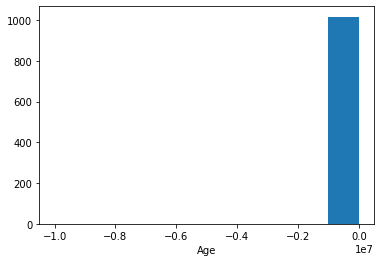

In [9]:
# visualise bar plot of 'Age'
# Import the relevant Python libraries.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Convert 'Age' to an array using Numpy and plot it using pyplot. 
sysArr = np.array(data.select('Age').collect())
plt.hist(sysArr)
plt.xlabel('Age')
plt.show()

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age before cleaning', ylabel='Density'>

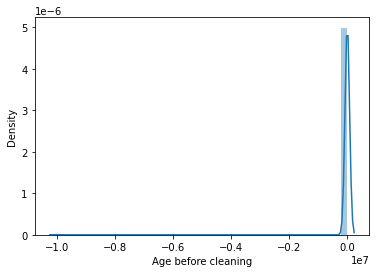

In [10]:
import seaborn as sns
sns.distplot(sysArr, axlabel='Age before cleaning')

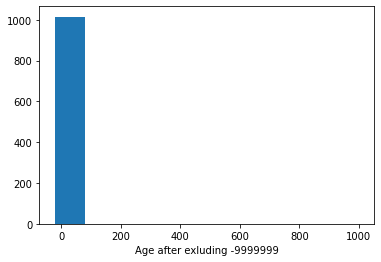

In [11]:
# delete extreme 'Age' value rows
data = data.filter(data.Age!=-9999999)
# visualise bar plot of 'Age'
# Convert 'Age' to an array using Numpy and plot it using pyplot. 
sysArr = np.array(data.select('Age').collect())
plt.hist(sysArr)
plt.xlabel('Age after exluding -9999999')
plt.show()

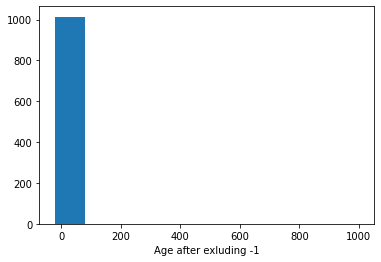

In [12]:
data = data.filter(data.Age!=-1)
# visualise bar plot of 'Age'
# Convert 'Age' to an array using Numpy and plot it using pyplot. 
sysArr = np.array(data.select('Age').collect())
plt.hist(sysArr)
plt.xlabel('Age after exluding -1')
plt.show()

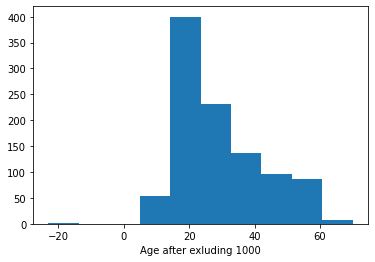

In [13]:
data = data.filter(data.Age!=1000)
# visualise bar plot of 'Age'
# Convert 'Age' to an array using Numpy and plot it using pyplot. 
sysArr = np.array(data.select('Age').collect())
plt.hist(sysArr)
plt.xlabel('Age after exluding 1000')
plt.show()

In [14]:
# select 'Age' <= 0 or 'Age' > 100
data.filter((data['Age']<=0) | (data['Age']>100)).show()

+---+----------+-----------+----------+--------+---------+---------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|
+---+----------+-----------+----------+--------+---------+---------+
|-23|       130|         70|       6.9|    98.0|       70| mid risk|
+---+----------+-----------+----------+--------+---------+---------+



In [15]:
data.select('Age').dtypes

[('Age', 'int')]

In [16]:
#Replace part of string with another string
from pyspark.sql.functions import regexp_replace
data = data.withColumn('Age', regexp_replace('Age', '-23', '23'))

In [17]:
data.select('Age').dtypes

[('Age', 'string')]

In [18]:
# Type cast string column to integer column in pyspark
from pyspark.sql.types import IntegerType
data = data.withColumn("Age", data["Age"].cast(IntegerType()))

In [19]:
data.select('Age').dtypes

[('Age', 'int')]

In [20]:
data.filter(data.Age==-23).show()

+---+----------+-----------+----------+--------+---------+---------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|
+---+----------+-----------+----------+--------+---------+---------+
+---+----------+-----------+----------+--------+---------+---------+



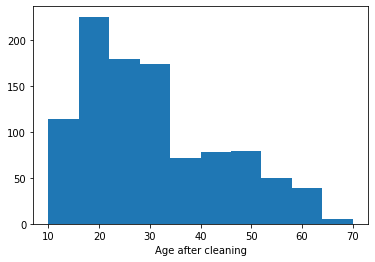

In [21]:
# visualise bar plot of 'Age'
# Convert 'Age' to an array using Numpy and plot it using pyplot. 
sysArr = np.array(data.select('Age').collect())
plt.hist(sysArr)
plt.xlabel('Age after cleaning')
plt.show()

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age after cleaning', ylabel='Density'>

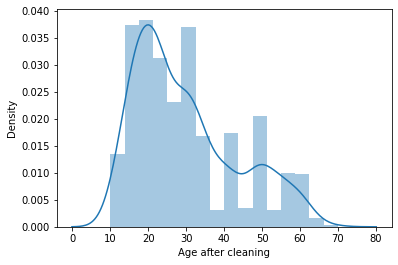

In [22]:
sns.distplot(sysArr, axlabel='Age after cleaning')

In [23]:
# find average 'Age'
data.agg({'Age': 'avg'}).show()

+-----------------+
|         avg(Age)|
+-----------------+
|29.85404339250493|
+-----------------+



/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='heartRate before cleaning', ylabel='Density'>

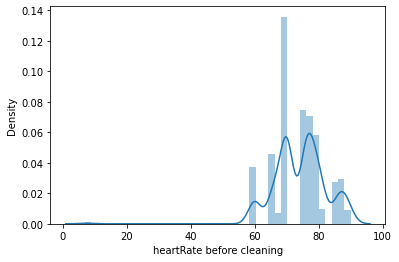

In [24]:
# dist of 'heartRate before cleaning'
sysArr = np.array(data.select('heartRate').collect())
sns.distplot(sysArr, axlabel='heartRate before cleaning')

In [25]:
# exclude extreme 'heartRate' values
data = data.filter(data.heartRate!=7)

In [26]:
data.filter(data.heartRate==7).show()

+---+----------+-----------+----------+--------+---------+---------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|
+---+----------+-----------+----------+--------+---------+---------+
+---+----------+-----------+----------+--------+---------+---------+



/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='heartRate after cleaning', ylabel='Density'>

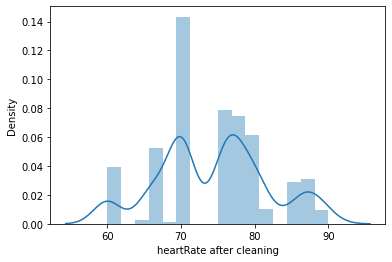

In [27]:
# dist of 'heartRate' after cleaning
sysArr = np.array(data.select('heartRate').collect())
sns.distplot(sysArr, axlabel='heartRate after cleaning')

In [28]:
# description after cleaning
data.describe('Age', 'SystolicBP', 'DiastolicBP', 'bloodsugar', 'bodyTemp', 'heartRate').show()

+-------+------------------+------------------+------------------+-----------------+------------------+-----------------+
|summary|               Age|        SystolicBP|       DiastolicBP|       bloodsugar|          bodyTemp|        heartRate|
+-------+------------------+------------------+------------------+-----------------+------------------+-----------------+
|  count|              1012|              1012|              1012|             1012|              1012|             1012|
|   mean|29.881422924901187|113.15513833992095| 76.43873517786561|8.719812252964427| 98.66442687747035|74.41501976284584|
| stddev|13.458871325636034|18.400550546547663|13.897505329476102|3.291063983088068|1.3748192463115287|7.507180321494286|
|    min|                10|                70|                49|              6.0|              96.0|               60|
|    max|                70|               160|               100|             19.0|             103.0|               90|
+-------+---------------

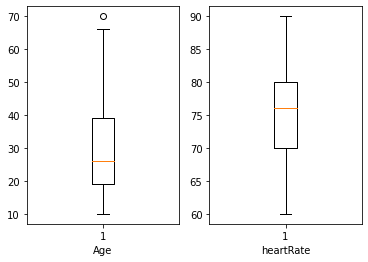

In [29]:
# Convert 'Age' to an array using Numpy and plot it using pyplot. 
aysArr = np.array(data.select('Age').collect())
plt.subplot(1,2,1);
plt.boxplot(aysArr)
plt.xlabel('Age')

# Convert 'heartRate' to an array using Numpy and plot it using pyplot. 
hysArr = np.array(data.select('heartRate').collect())
plt.subplot(1,2,2)
plt.boxplot(hysArr)
plt.xlabel('heartRate')
plt.show()

In [30]:
data.groupby(['riskLevel']).count().show()

+---------+-----+
|riskLevel|count|
+---------+-----+
|     High|    1|
|      Low|    1|
| low risk|  403|
|low risk |    1|
| MID RISK|    1|
|HIGH RISK|    1|
| mid risk|  333|
|      Mid|    1|
|mid risk |    1|
|high risk|  269|
+---------+-----+



In [31]:
data.select('*').dtypes

[('Age', 'int'),
 ('SystolicBP', 'int'),
 ('DiastolicBP', 'int'),
 ('bloodsugar', 'double'),
 ('bodyTemp', 'double'),
 ('heartRate', 'int'),
 ('riskLevel', 'string')]

In [32]:
# Type cast in pyspark
from pyspark.sql.types import *
data=data.withColumn('Age', data['Age'].cast(DoubleType()))
data=data.withColumn('SystolicBP', data['SystolicBP'].cast(DoubleType()))
data = data.withColumn("DiastolicBP", data["DiastolicBP"].cast(DoubleType()))

In [33]:
data.select('*').dtypes

[('Age', 'double'),
 ('SystolicBP', 'double'),
 ('DiastolicBP', 'double'),
 ('bloodsugar', 'double'),
 ('bodyTemp', 'double'),
 ('heartRate', 'int'),
 ('riskLevel', 'string')]

In [34]:
data.groupby(['riskLevel']).count().show()

+---------+-----+
|riskLevel|count|
+---------+-----+
|     High|    1|
|      Low|    1|
| low risk|  403|
|low risk |    1|
| MID RISK|    1|
|HIGH RISK|    1|
| mid risk|  333|
|      Mid|    1|
|mid risk |    1|
|high risk|  269|
+---------+-----+



In [35]:
f=data.where(data.riskLevel.startswith('L'))
f.show()

+----+----------+-----------+----------+--------+---------+---------+
| Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|
+----+----------+-----------+----------+--------+---------+---------+
|23.0|     100.0|       85.0|       7.1|    98.0|       66|      Low|
+----+----------+-----------+----------+--------+---------+---------+



In [36]:
import pyspark.sql.functions as F

for i in range(0,f.count()):
    data=data.withColumn('riskLevel', F.regexp_replace('riskLevel', f.collect()[i]['riskLevel'], "low risk"))

In [37]:
data.groupby('riskLevel').count().show()

+---------+-----+
|riskLevel|count|
+---------+-----+
|     High|    1|
| low risk|  404|
|low risk |    1|
| MID RISK|    1|
|HIGH RISK|    1|
| mid risk|  333|
|      Mid|    1|
|mid risk |    1|
|high risk|  269|
+---------+-----+



In [38]:
f=data.where(data.riskLevel.startswith('M'))
f.show()

+----+----------+-----------+----------+--------+---------+---------+
| Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|
+----+----------+-----------+----------+--------+---------+---------+
|44.0|     120.0|       90.0|      16.0|    98.0|       80| MID RISK|
|29.0|     130.0|       70.0|       7.5|    98.0|       78|      Mid|
+----+----------+-----------+----------+--------+---------+---------+



In [39]:
for i in range(0, f.count()):
    data=data.withColumn('riskLevel',
                     F.regexp_replace('riskLevel', f.collect()[i]['riskLevel'], 'mid risk')) 

In [40]:
data.groupby('riskLevel').count().show()

+---------+-----+
|riskLevel|count|
+---------+-----+
|     High|    1|
| low risk|  404|
|low risk |    1|
|HIGH RISK|    1|
| mid risk|  335|
|mid risk |    1|
|high risk|  269|
+---------+-----+



In [41]:
f=data.where(data.riskLevel.startswith('H'))
f.show()

+----+----------+-----------+----------+--------+---------+---------+
| Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|
+----+----------+-----------+----------+--------+---------+---------+
|34.0|      85.0|       60.0|      11.0|   102.0|       86|HIGH RISK|
|63.0|     140.0|       90.0|      15.0|    98.0|       90|     High|
+----+----------+-----------+----------+--------+---------+---------+



In [42]:
for i in range(0,f.count()):
    data=data.withColumn('riskLevel',
                     F.regexp_replace('riskLevel', f.collect()[i]['riskLevel'], 'high risk')) 

In [43]:
data.groupby(['riskLevel']).count().show()

+---------+-----+
|riskLevel|count|
+---------+-----+
| low risk|  404|
|low risk |    1|
| mid risk|  335|
|mid risk |    1|
|high risk|  271|
+---------+-----+



In [44]:
# Remove leading space of the column in pyspark
data=data.withColumn('riskLevel', F.trim(data.riskLevel))
data.groupby(['riskLevel']).count().show()

+---------+-----+
|riskLevel|count|
+---------+-----+
| low risk|  405|
| mid risk|  336|
|high risk|  271|
+---------+-----+



<BarContainer object of 3 artists>

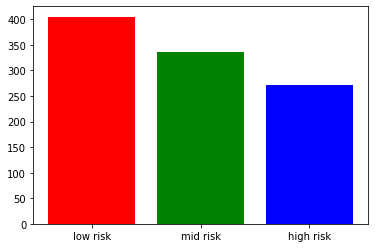

In [45]:
df=data.groupby('riskLevel').count()
df=df.toPandas()
plt.bar(df['riskLevel'].values, df['count'].values, color=['red','green','blue'])

In [46]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="riskLevel", outputCol="riskLevelIndex")
data = indexer.fit(data).transform(data)

In [47]:
data.groupby('riskLevel').count().show()

+---------+-----+
|riskLevel|count|
+---------+-----+
| low risk|  405|
| mid risk|  336|
|high risk|  271|
+---------+-----+



In [48]:
data.groupby('riskLevelIndex').count().show()

+--------------+-----+
|riskLevelIndex|count|
+--------------+-----+
|           0.0|  405|
|           1.0|  336|
|           2.0|  271|
+--------------+-----+



In [49]:
data.columns

['Age',
 'SystolicBP',
 'DiastolicBP',
 'bloodsugar',
 'bodyTemp',
 'heartRate',
 'riskLevel',
 'riskLevelIndex']

In [50]:
data=data.withColumnRenamed('bloodsugar', 'BS').withColumnRenamed('bodyTemp', 'BodyTemp')
data=data.withColumnRenamed('heartRate', 'HeartRate').withColumnRenamed('riskLevel', 'RiskLevel')
data=data.withColumnRenamed('riskLevelIndex', 'RiskLevelIndex')

In [51]:
data.columns

['Age',
 'SystolicBP',
 'DiastolicBP',
 'BS',
 'BodyTemp',
 'HeartRate',
 'RiskLevel',
 'RiskLevelIndex']

In [52]:
data.select('*').dtypes

[('Age', 'double'),
 ('SystolicBP', 'double'),
 ('DiastolicBP', 'double'),
 ('BS', 'double'),
 ('BodyTemp', 'double'),
 ('HeartRate', 'int'),
 ('RiskLevel', 'string'),
 ('RiskLevelIndex', 'double')]

In [53]:
# data type cast in pyspark
data=data.withColumn('RiskLevelIndex', data['RiskLevelIndex'].cast(IntegerType()))

In [54]:
data.select('*').dtypes

[('Age', 'double'),
 ('SystolicBP', 'double'),
 ('DiastolicBP', 'double'),
 ('BS', 'double'),
 ('BodyTemp', 'double'),
 ('HeartRate', 'int'),
 ('RiskLevel', 'string'),
 ('RiskLevelIndex', 'int')]

In [64]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate'],
    outputCol="features")

In [65]:
output=assembler.transform(data)
output.show(5)

+----+----------+-----------+----+--------+---------+---------+--------------+--------------------+
| Age|SystolicBP|DiastolicBP|  BS|BodyTemp|HeartRate|RiskLevel|RiskLevelIndex|            features|
+----+----------+-----------+----+--------+---------+---------+--------------+--------------------+
|25.0|     130.0|       80.0|15.0|    98.0|       86|high risk|             2|[25.0,130.0,80.0,...|
|35.0|     140.0|       90.0|13.0|    98.0|       70|high risk|             2|[35.0,140.0,90.0,...|
|29.0|      90.0|       70.0| 8.0|   100.0|       80|high risk|             2|[29.0,90.0,70.0,8...|
|30.0|     140.0|       85.0| 7.0|    98.0|       70|high risk|             2|[30.0,140.0,85.0,...|
|35.0|     120.0|       60.0| 6.1|    98.0|       76| low risk|             0|[35.0,120.0,60.0,...|
+----+----------+-----------+----+--------+---------+---------+--------------+--------------------+
only showing top 5 rows



In [57]:
target=data.select(['RiskLevelIndex']).toPandas()
target[0:5]

,RiskLevelIndex
0,2
1,2
2,2
3,2
4,0


In [121]:
standardScaler.setInputCol('features')
model=standardScaler.fit(output)
model.setOutputCol('features_scaled')

StandardScalerModel: uid=StandardScaler_37b8f40e24ac, numFeatures=6, withMean=false, withStd=true

In [155]:
output_scaled=model.transform(output)

In [162]:
# Add column using select
np.round(output_scaled.select('features_scaled').collect(), 4)

array([[[ 1.8575,  7.065 ,  5.7564,  4.5578, 71.2821, 11.4557]],

       [[ 2.6005,  7.6085,  6.476 ,  3.9501, 71.2821,  9.3244]],

       [[ 2.1547,  4.8912,  5.0369,  2.4308, 72.7368, 10.6565]],

       ...,

       [[ 2.6005,  4.6194,  4.3173,  5.7732, 71.2821, 11.4557]],

       [[ 3.1949,  6.5215,  6.476 ,  5.4694, 71.2821,  9.3244]],

       [[ 2.3776,  6.5215,  4.6771,  1.8231, 73.4642, 10.1236]]])

In [134]:
output_scaled.select('features_scaled').show()

+--------------------+
|     features_scaled|
+--------------------+
|[1.85751088595228...|
|[2.60051524033319...|
|[2.15471262770465...|
|[2.22901306314274...|
|[2.60051524033319...|
|[1.70891001507610...|
|[1.70891001507610...|
|[2.60051524033319...|
|[2.37761393401892...|
|[3.12061828839984...|
|[1.70891001507610...|
|[1.41170827332373...|
|[1.85751088595228...|
|[1.48600870876182...|
|[3.56642090102838...|
|[1.11450653157137...|
|[3.71502177190457...|
|[1.85751088595228...|
|[2.22901306314274...|
|[0.74300435438091...|
+--------------------+
only showing top 20 rows



In [140]:
new=np.round(output_scaled.select('features_scaled').collect(), 4)
new

array([[[ 1.8575,  7.065 ,  5.7564,  4.5578, 71.2821, 11.4557]],

       [[ 2.6005,  7.6085,  6.476 ,  3.9501, 71.2821,  9.3244]],

       [[ 2.1547,  4.8912,  5.0369,  2.4308, 72.7368, 10.6565]],

       ...,

       [[ 2.6005,  4.6194,  4.3173,  5.7732, 71.2821, 11.4557]],

       [[ 3.1949,  6.5215,  6.476 ,  5.4694, 71.2821,  9.3244]],

       [[ 2.3776,  6.5215,  4.6771,  1.8231, 73.4642, 10.1236]]])

In [154]:
output_scaled=output_scaled.withColumn('features_rounded', F.col(np.round(output_scaled.select('features_scaled').collect(), 4)))

Py4JError: An error occurred while calling z:org.apache.spark.sql.functions.col. Trace:
py4j.Py4JException: Method col([class java.util.ArrayList]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:318)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:339)
	at py4j.Gateway.invoke(Gateway.java:276)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)



In [153]:
output_scaled.dtypes

[('Age', 'double'),
 ('SystolicBP', 'double'),
 ('DiastolicBP', 'double'),
 ('BS', 'double'),
 ('BodyTemp', 'double'),
 ('HeartRate', 'int'),
 ('RiskLevel', 'string'),
 ('RiskLevelIndex', 'int'),
 ('features', 'vector'),
 ('features_scaled', 'vector')]

In [108]:
np.round(output_scaled.select('features_scaled').collect(), 4)

#*', np.round('features_scaled',decimals=2)).show()

array([[[ 1.8575,  7.065 ,  5.7564,  4.5578, 71.2821, 11.4557]],

       [[ 2.6005,  7.6085,  6.476 ,  3.9501, 71.2821,  9.3244]],

       [[ 2.1547,  4.8912,  5.0369,  2.4308, 72.7368, 10.6565]],

       ...,

       [[ 2.6005,  4.6194,  4.3173,  5.7732, 71.2821, 11.4557]],

       [[ 3.1949,  6.5215,  6.476 ,  5.4694, 71.2821,  9.3244]],

       [[ 2.3776,  6.5215,  4.6771,  1.8231, 73.4642, 10.1236]]])

In [99]:
output_scaled.select('features_scaled',round("ID",2)).show()

TypeError: type str doesn't define __round__ method

In [58]:
from pyspark.ml.feature import StandardScaler
standardScaler = StandardScaler()
assembler = VectorAssembler(
    inputCols=['Age'],
    outputCol="age_features")
output=assembler.transform(data)
standardScaler.setInputCol('age_features')
model = standardScaler.fit(output)
model.setOutputCol('age_scaled')
output_scaled=model.transform(output)

In [59]:
output.show(5)

+----+----------+-----------+----+--------+---------+---------+--------------+------------+
| Age|SystolicBP|DiastolicBP|  BS|BodyTemp|HeartRate|RiskLevel|RiskLevelIndex|age_features|
+----+----------+-----------+----+--------+---------+---------+--------------+------------+
|25.0|     130.0|       80.0|15.0|    98.0|       86|high risk|             2|      [25.0]|
|35.0|     140.0|       90.0|13.0|    98.0|       70|high risk|             2|      [35.0]|
|29.0|      90.0|       70.0| 8.0|   100.0|       80|high risk|             2|      [29.0]|
|30.0|     140.0|       85.0| 7.0|    98.0|       70|high risk|             2|      [30.0]|
|35.0|     120.0|       60.0| 6.1|    98.0|       76| low risk|             0|      [35.0]|
+----+----------+-----------+----+--------+---------+---------+--------------+------------+
only showing top 5 rows



In [60]:
standardScaler.setInputCol('features')
model=standardScaler.fit(output)

IllegalArgumentException: features does not exist. Available: Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate, RiskLevel, RiskLevelIndex, age_features

In [104]:
Pipeline(stages=stages).fit(df).transform(df).schema["features"].metadata

IllegalArgumentException: requirement failed: Output column riskLevel already exists.

In [25]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorAssembler

In [26]:
x=data.columns[0:6]

In [27]:
import pandas as pd
data.columns[0:7]

['Age',
 'SystolicBP',
 'DiastolicBP',
 'bloodsugar',
 'bodyTemp',
 'heartRate',
 'riskLevel']

In [28]:
df_data=data.select(data.columns[0:7])
df_data.show()

+---+----------+-----------+----------+--------+---------+---------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|
+---+----------+-----------+----------+--------+---------+---------+
| 25|       130|         80|      15.0|    98.0|       86|high risk|
| 35|       140|         90|      13.0|    98.0|       70|high risk|
| 29|        90|         70|       8.0|   100.0|       80|high risk|
| 30|       140|         85|       7.0|    98.0|       70|high risk|
| 35|       120|         60|       6.1|    98.0|       76| low risk|
| 23|       140|         80|      7.01|    98.0|       70|high risk|
| 23|       130|         70|      7.01|    98.0|       78| mid risk|
| 35|        85|         60|      11.0|   102.0|       86|high risk|
| 32|       120|         90|       6.9|    98.0|       70| mid risk|
| 42|       130|         80|      18.0|    98.0|       70|high risk|
| 23|        90|         60|      7.01|    98.0|       76| low risk|
| 19|       120|         80|      

In [29]:
df_data=data.select(data.columns[0:7])
df_data.show(3)

+---+----------+-----------+----------+--------+---------+---------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|
+---+----------+-----------+----------+--------+---------+---------+
| 25|       130|         80|      15.0|    98.0|       86|high risk|
| 35|       140|         90|      13.0|    98.0|       70|high risk|
| 29|        90|         70|       8.0|   100.0|       80|high risk|
+---+----------+-----------+----------+--------+---------+---------+
only showing top 3 rows



In [30]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="riskLevel", outputCol="riskLevelIndex")
indexed = indexer.fit(df_data).transform(df_data)
indexed.show()

+---+----------+-----------+----------+--------+---------+---------+--------------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|riskLevelIndex|
+---+----------+-----------+----------+--------+---------+---------+--------------+
| 25|       130|         80|      15.0|    98.0|       86|high risk|           2.0|
| 35|       140|         90|      13.0|    98.0|       70|high risk|           2.0|
| 29|        90|         70|       8.0|   100.0|       80|high risk|           2.0|
| 30|       140|         85|       7.0|    98.0|       70|high risk|           2.0|
| 35|       120|         60|       6.1|    98.0|       76| low risk|           0.0|
| 23|       140|         80|      7.01|    98.0|       70|high risk|           2.0|
| 23|       130|         70|      7.01|    98.0|       78| mid risk|           1.0|
| 35|        85|         60|      11.0|   102.0|       86|high risk|           2.0|
| 32|       120|         90|       6.9|    98.0|       70| mid risk|        

In [31]:
indexed=indexed.select(['Age', 'SystolicBP', 'DiastolicBP', 'bloodsugar', 'bodyTemp', 'heartRate', 'riskLevelIndex'])
indexed.show(3)

+---+----------+-----------+----------+--------+---------+--------------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevelIndex|
+---+----------+-----------+----------+--------+---------+--------------+
| 25|       130|         80|      15.0|    98.0|       86|           2.0|
| 35|       140|         90|      13.0|    98.0|       70|           2.0|
| 29|        90|         70|       8.0|   100.0|       80|           2.0|
+---+----------+-----------+----------+--------+---------+--------------+
only showing top 3 rows



In [32]:
df_data=indexed
print(df_data.printSchema()) 

root
 |-- Age: integer (nullable = true)
 |-- SystolicBP: integer (nullable = true)
 |-- DiastolicBP: integer (nullable = true)
 |-- bloodsugar: double (nullable = true)
 |-- bodyTemp: double (nullable = true)
 |-- heartRate: integer (nullable = true)
 |-- riskLevelIndex: double (nullable = false)

None


In [33]:
va = VectorAssembler(inputCols = x, outputCol='features')

va_df = va.transform(indexed)
va_df.show(3)

+---+----------+-----------+----------+--------+---------+--------------+--------------------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevelIndex|            features|
+---+----------+-----------+----------+--------+---------+--------------+--------------------+
| 25|       130|         80|      15.0|    98.0|       86|           2.0|[25.0,130.0,80.0,...|
| 35|       140|         90|      13.0|    98.0|       70|           2.0|[35.0,140.0,90.0,...|
| 29|        90|         70|       8.0|   100.0|       80|           2.0|[29.0,90.0,70.0,8...|
+---+----------+-----------+----------+--------+---------+--------------+--------------------+
only showing top 3 rows



In [34]:
va_df = va_df.select(['features', 'riskLevelIndex'])
va_df.show(3)

+--------------------+--------------+
|            features|riskLevelIndex|
+--------------------+--------------+
|[25.0,130.0,80.0,...|           2.0|
|[35.0,140.0,90.0,...|           2.0|
|[29.0,90.0,70.0,8...|           2.0|
+--------------------+--------------+
only showing top 3 rows



In [43]:
DT = DecisionTreeClassifier(featuresCol="features", labelCol='riskLevelIndex', seed=4)
DT=DT.fit(va_df)
DT

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_b51b22344020, depth=5, numNodes=25, numClasses=11, numFeatures=6

In [44]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [45]:
DT.featureImportances

SparseVector(6, {0: 0.0434, 1: 0.2996, 3: 0.6118, 4: 0.039, 5: 0.0062})

In [46]:
indexed.show()

+---+----------+-----------+----------+--------+---------+--------------+
|Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevelIndex|
+---+----------+-----------+----------+--------+---------+--------------+
| 25|       130|         80|      15.0|    98.0|       86|           2.0|
| 35|       140|         90|      13.0|    98.0|       70|           2.0|
| 29|        90|         70|       8.0|   100.0|       80|           2.0|
| 30|       140|         85|       7.0|    98.0|       70|           2.0|
| 35|       120|         60|       6.1|    98.0|       76|           0.0|
| 23|       140|         80|      7.01|    98.0|       70|           2.0|
| 23|       130|         70|      7.01|    98.0|       78|           1.0|
| 35|        85|         60|      11.0|   102.0|       86|           2.0|
| 32|       120|         90|       6.9|    98.0|       70|           1.0|
| 42|       130|         80|      18.0|    98.0|       70|           2.0|
| 23|        90|         60|      7.01

In [47]:
features_imp_pd = (
     pd.DataFrame(
       DT.featureImportances.toArray(), 
       index=indexed.columns[0:6], 
       columns=['importance'])
)

In [48]:
features_imp_pd

,importance
Age,0.043358
SystolicBP,0.299582
DiastolicBP,0.000000
bloodsugar,0.611776
bodyTemp,0.039046
heartRate,0.006239


<BarContainer object of 6 artists>

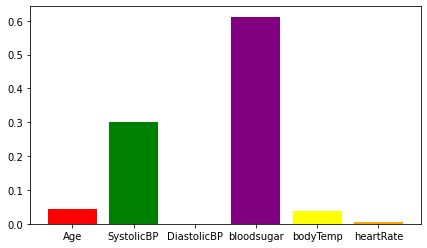

In [49]:
# plot feature importance
new_color = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']
plt.rcParams["figure.figsize"]=(7,4)
plt.bar(indexed.columns[0:6], DT.featureImportances.toArray(), color=new_color)

In [50]:
cor=[]; col=[]
for i in range(0,6):
    cor.append(df_data.stat.corr(df_data.columns[i], 'riskLevelIndex'))
    col.append(df_data.columns[i])
pd.DataFrame(cor,col, columns=['correlation coefficient with riskLevel'])

,correlation coefficient with riskLevel
Age,0.029405
SystolicBP,0.336651
DiastolicBP,0.300648
bloodsugar,0.481743
bodyTemp,0.114231
heartRate,0.174703


In [51]:
# select 'Age' <= 0 or 'Age' > 100
data.filter((data['Age']<=0) | (data['Age']>100) | (data['riskLevel'] == " ") | (data['heartRate']==7)).show()

+--------+----------+-----------+----------+--------+---------+---------+----------+
|     Age|SystolicBP|DiastolicBP|bloodsugar|bodyTemp|heartRate|riskLevel|   comment|
+--------+----------+-----------+----------+--------+---------+---------+----------+
|      15|       110|         90|      7.02|    98.0|       70|         |no comment|
|-9999999|       110|         65|       7.1|    96.0|       70| low risk|no comment|
|      -1|       110|         65|       7.1|    96.0|       70| low risk|no comment|
|     -23|       130|         70|       6.9|    98.0|       70| mid risk|no comment|
|    1000|       110|         65|       7.1|    96.0|       70| low risk|no comment|
|      16|       120|         75|       7.9|    98.0|        7| low risk|no comment|
|      16|       120|         75|       7.9|    98.0|        7| low risk|no comment|
+--------+----------+-----------+----------+--------+---------+---------+----------+



In [56]:
# extreme values of the column in pyspark
data.agg({'Age': 'min'}).show()

+--------+
|min(Age)|
+--------+
|-9999999|
+--------+



In [57]:
# extreme value
data.agg({'Age': 'max'}).show()

+--------+
|max(Age)|
+--------+
|    1000|
+--------+



In [263]:
# extreme value and count
data.agg({'heartRate': 'min'}).show()

+--------------+
|min(heartRate)|
+--------------+
|             7|
+--------------+



In [276]:
data.filter(data['heartRate']==7).count()

2

Text(0.5, 0, 'heartRate')

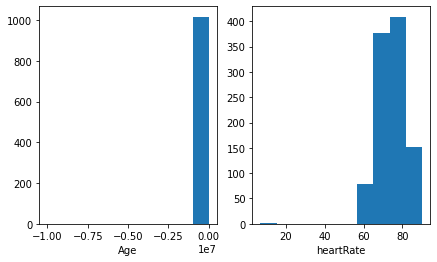

In [282]:
# Convert 'Age' to an array using Numpy and plot it using pyplot. 
ag = np.array(data.select('Age').collect()); 
plt.subplot(1,2,1); plt.hist(ag); plt.xlabel('Age')

hr = np.array(data.select('heartRate').collect());
plt.subplot(1,2,2); plt.hist(hr); plt.xlabel('heartRate')

In [285]:
# unique classes and counts of 'riskLevel'
rl = data.groupby(['riskLevel']).count()
rl.show()

+---------+-----+
|riskLevel|count|
+---------+-----+
|     High|    1|
|      Low|    1|
| low risk|  408|
|low risk |    1|
| MID RISK|    1|
|HIGH RISK|    1|
| mid risk|  333|
|      Mid|    1|
|mid risk |    1|
|high risk|  269|
|         |    1|
+---------+-----+

